In [20]:
import pandas as pd
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from geneticalgorithm import geneticalgorithm as ga
from tqdm import tqdm
import math
from scipy.spatial import distance
from time import time

In [35]:
data_path='D:\\dr.tabadkani\\Results\\pre\\hours\\'
path=os.listdir(data_path)

In [36]:
path

['4848.xlsx',
 '4849.xlsx',
 '4850.xlsx',
 '4851.xlsx',
 '4852.xlsx',
 '4853.xlsx',
 '4854.xlsx',
 '4855.xlsx',
 '4856.xlsx',
 '4857.xlsx',
 '4858.xlsx',
 '4859.xlsx',
 '4860.xlsx',
 '4861.xlsx',
 '4862.xlsx',
 '4863.xlsx',
 '4864.xlsx',
 '4865.xlsx',
 '4866.xlsx',
 '4867.xlsx',
 '4868.xlsx',
 '4869.xlsx',
 '4870.xlsx',
 '4871.xlsx',
 '4872.xlsx']

In [37]:
im=[]
g=data_path
for i in path:
    s=g+i
    im.append(s)
    

In [38]:
im

['D:\\dr.tabadkani\\Results\\pre\\hours\\4848.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4849.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4850.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4851.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4852.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4853.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4854.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4855.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4856.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4857.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4858.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4859.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4860.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4861.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4862.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4863.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4864.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4865.xlsx',
 'D:\\dr.tabadkani\\Results\\pre\\hours\\4866.

In [39]:
def dataframe(i):
    df=pd.read_excel(i)
    df=df.drop(columns='Unnamed: 0')
    df=abs(df)
    name=[11,12,13,14,111,112,113,114,121,122,123,124,21,22,23,24,31,32,33,34,41,42,43,44,51,52,53,54,61,62,63,64,71,72,73,74,
     81,
     82,
     83,
     84,
     91,
     92,
     93,
     94,
     101,
     102,
     103,
     104]
    df['name']=name
    df=df.sort_values('name')
    df['VR2']=[0,0,0,0,0,0,0,0,0.3,0.7,0.8,0.7,0.3,0.7,0.8,0.7,0,0,0,0,0,0,0,0,0.3,0.7,0.8,0.7,0.3,0.7,0.8,0.7,0,0,0,0,0,0,0,0,0.3,0.7,0.8,0.7,0.3,0.7,0.8,0.7]
    df['VR1']=[0.3,0.7,0.8,0.7,0.3,0.7,0.8,0.7,0,0,0,0,0,0,0,0,0.3,0.7,0.8,0.7,0.3,0.7,0.8,0.7,0,0,0,0,0,0,0,0,0.3,0.7,0.8,0.7,0.3,0.7,0.8,0.7,0,0,0,0,0,0,0,0]

    p=[]
    for i in range(1,13):
        for j in range(1,5):
            p.append(j)
    df['position_number']=p
    df=round(df,ndigits=2)
    df['sum']=df[['Ev_U1','Ev_U2','Et_U1','Et_U2']].sum(axis=1)
    
    return df

In [40]:
def fuzzy(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,a,b,c,d,e,f) : 
  
    EV1=ctrl.Antecedent(np.arange(0,2*EVP1,0.001),'EV1')
    EV2=ctrl.Antecedent(np.arange(0,2*EVP2,0.001),'EV2')
    ET1=ctrl.Antecedent(np.arange(0,2*ETP1,0.001),'ET1')
    ET2=ctrl.Antecedent(np.arange(0,2*ETP2,0.001),'ET2')
    VR1=ctrl.Antecedent(np.arange(0,1,0.0001),'VR1')
    VR2=ctrl.Antecedent(np.arange(0,1,0.0001),'VR2')
    comfort=ctrl.Consequent(np.arange(-5,35.01,0.01),'comfort')

    ET1['bad']=fuzz.trapmf(ET1.universe,(0,0,ETP1-100,ETP1))
    ET1['good']=fuzz.trapmf(ET1.universe,(ETP1-100,ETP1,2*ETP1,2*ETP1))
    
    ET2['bad']=fuzz.trapmf(ET2.universe,(0,0,ETP2-50,ETP2))
    ET2['good']=fuzz.trapmf(ET2.universe,(ETP2-50,ETP2,2*ETP2,2*ETP2))
    
    EV1['good']=fuzz.trapmf(EV1.universe,(0,0,EVP1,EVP1+600))
    EV1['bad']=fuzz.trapmf(EV1.universe,(EVP1,EVP1+600,2*EVP1,2*EVP1))
    EV2['good']=fuzz.trapmf(EV2.universe,(0,0,EVP2,EVP2+1000))
    EV2['bad']=fuzz.trapmf(EV2.universe,(EVP2,EVP2+1000,2*EVP2,2*EVP2))
    VR1['good']=fuzz.trapmf(VR1.universe,(VRP1-0.1,VRP1,0.9,0.9))
    VR1['bad']=fuzz.trapmf(VR1.universe,(0,0,VRP1-0.1,VRP1))
    VR2['good']=fuzz.trapmf(VR2.universe,(VRP2-0.1,VRP2,0.9,0.9))
    VR2['bad']=fuzz.trapmf(VR2.universe,(0,0,VRP2-0.1,VRP2))



    comfort['m13']=fuzz.gaussmf(comfort.universe,30,1)
    comfort['m12']=fuzz.gaussmf(comfort.universe,27.58,1)
    comfort['m11']=fuzz.gaussmf(comfort.universe,25.16,1)
    comfort['m10']=fuzz.gaussmf(comfort.universe,22.75,1)
    comfort['m9']=fuzz.gaussmf(comfort.universe,20.33,1) 
    comfort['m8']=fuzz.gaussmf(comfort.universe,17.91,1)   
    comfort['m7']=fuzz.gaussmf(comfort.universe,15.5,1)   
    comfort['m6']=fuzz.gaussmf(comfort.universe,13.08,1)    
    comfort['m5']=fuzz.gaussmf(comfort.universe,10.66,1)   
    comfort['m4']=fuzz.gaussmf(comfort.universe,8.25,1)    
    comfort['m3']=fuzz.gaussmf(comfort.universe,5.83,1)  
    comfort['m2']=fuzz.gaussmf(comfort.universe,3.41,1)  
    comfort['m1']=fuzz.gaussmf(comfort.universe,1.0,1)


    rule1= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m13'])
    rule2 = ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m12'])
    rule3 = ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m12'])

    rule4= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m11'])
    rule5= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m11'])
    
    rule6= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m11'])
    
    rule7= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m10'])
    rule8= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m10'])
    rule9= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m10'])
    rule10= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m10'])
    rule11= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m10'])
    rule12= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m10'])
    
    rule13=ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m9']) 
    
    
    rule14= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m9'])
    rule15= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m9'])
    
    rule16= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m9'])   
    rule17= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m9'])
    rule18 = ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m9'])   
    rule19= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m9']) 
    
    rule20= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m8'])  
    rule21= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m8'])
    rule22 = ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m8'])
    rule23= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m8'])
    rule24= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m8'])
    rule25= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m8'])
    
    rule26= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m8'])
    rule27= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m8'])
    
    rule28= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m7'])
    rule29= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m7'])
    rule30= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m7'])
    rule31= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m7'])
    rule32= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m7'])
    rule33= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m7'])
    rule34= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m7'])
    rule35= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m7'])
    rule36= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m7'])
    rule37= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m7'])
    
    
    
    rule38= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m6'])
    rule39= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m6'])
    
    rule40= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m6'])
    rule41= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m6'])   
    rule42= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m6'])
    rule43= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m6'])
    rule44= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m6'])
    rule45= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m6'])
    
    rule46= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m5'])

    
    rule47= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m5'])
    rule48= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m5'])
    rule49= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m5'])
    rule50= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m5'])
    rule51= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m5'])
    
    rule52= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m5'])


    rule53= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m4'])
    rule54= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m4'])
    rule55= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m4'])
    
    rule56= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m4'])
    rule57= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m4'])
    rule58= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m4'])
    
   
    rule59= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m3'])
    rule60= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m3'])
    rule61= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m3'])
    
        
    rule62= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m2'])
    rule63= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m2'])
    
    rule64= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m1'])

    
    
    c_ctrl=ctrl.ControlSystem([rule1,
    rule2,
    rule3,
    rule4,
    rule5,
    rule6,
    rule7,
    rule8,
    rule9,
    rule10,
    rule11,
    rule12, 
    rule13,
    rule14,
    rule15,
    rule16,
    rule17,
    rule18,
    rule19,
    rule20,
    rule21,
    rule22,
    rule23,
    rule24,
    rule25,
    rule26,
    rule27, 
    rule28,
    rule29,
    rule30,
    rule31,
    rule32,
    rule33,
    rule34,
    rule35,
    rule36,
    rule37, 
    rule38,
    rule39,
    rule40,
    rule41,
    rule42, 
    rule43,
    rule44,
    rule45,
    rule46,
    rule47, 
    rule48,
    rule49,
    rule50,
    rule51,
    rule52,
    rule53,
    rule54, 
    rule55,
    rule56,
    rule57,
    rule58,
    rule59,
    rule60,
    rule61,rule62,rule63,rule64

    ])

    #print(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2)
    shading = ctrl.ControlSystemSimulation(c_ctrl)

    shading.input['ET1'] =c
    shading.input['ET2'] =d
    shading.input['EV2'] =b
    shading.input['EV1'] =a
    shading.input['VR2'] =f
    shading.input['VR1'] =e
    f=shading.compute()
    r=shading.output['comfort']
    #EV1.view(sim=shading)
    #EV2.view(sim=shading)
    #ET1.view(sim=shading)
    #ET2.view(sim=shading)
    #VR1.view(sim=shading)
    #VR2.view(sim=shading)
    #comfort.view(sim=shading)


    return shading.output['comfort']

In [41]:
def fuzzy1(data1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,a,b,c,d,e,f,g,h,i,j,k,l) :
    
    p1=data1[0:4][int(a)-1:int(a)]
    p2=data1[4:8][int(b)-1:int(b)]
    p3=data1[8:12][int(c)-1:int(c)]
    p4=data1[12:16][int(d)-1:int(d)]
    p5=data1[16:20][int(e)-1:int(e)]
    p6=data1[20:24][int(f)-1:int(f)]
    p7=data1[24:28][int(g)-1:int(g)]
    p8=data1[28:32][int(h)-1:int(h)]
    p9=data1[32:36][int(i)-1:int(i)]
    p10=data1[36:40][int(j)-1:int(j)]
    p11=data1[40:44][int(k)-1:int(k)]
    p12=data1[44:48][int(l)-1:int(l)]
    concat=pd.concat([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12])        
      
    EV1=ctrl.Antecedent(np.arange(0,2*EVP1,0.001),'EV1')
    EV2=ctrl.Antecedent(np.arange(0,2*EVP2,0.001),'EV2')
    ET1=ctrl.Antecedent(np.arange(0,2*ETP1,0.001),'ET1')
    ET2=ctrl.Antecedent(np.arange(0,2*ETP2,0.001),'ET2')
    VR1=ctrl.Antecedent(np.arange(0,1,0.0001),'VR1')
    VR2=ctrl.Antecedent(np.arange(0,1,0.0001),'VR2')
    comfort=ctrl.Consequent(np.arange(-5,35.01,0.01),'comfort')

    ET1['bad']=fuzz.trapmf(ET1.universe,(0,0,ETP1-100,ETP1))
    ET1['good']=fuzz.trapmf(ET1.universe,(ETP1-100,ETP1,2*ETP1,2*ETP1))
    
    ET2['bad']=fuzz.trapmf(ET2.universe,(0,0,ETP2-50,ETP2))
    ET2['good']=fuzz.trapmf(ET2.universe,(ETP2-50,ETP2,2*ETP2,2*ETP2))
    
    EV1['good']=fuzz.trapmf(EV1.universe,(0,0,EVP1,EVP1+600))
    EV1['bad']=fuzz.trapmf(EV1.universe,(EVP1,EVP1+600,2*EVP1,2*EVP1))
    EV2['good']=fuzz.trapmf(EV2.universe,(0,0,EVP2,EVP2+1000))
    EV2['bad']=fuzz.trapmf(EV2.universe,(EVP2,EVP2+1000,2*EVP2,2*EVP2))
    VR1['good']=fuzz.trapmf(VR1.universe,(VRP1-0.1,VRP1,0.9,0.9))
    VR1['bad']=fuzz.trapmf(VR1.universe,(0,0,VRP1-0.1,VRP1))
    VR2['good']=fuzz.trapmf(VR2.universe,(VRP2-0.1,VRP2,0.9,0.9))
    VR2['bad']=fuzz.trapmf(VR2.universe,(0,0,VRP2-0.1,VRP2))



    comfort['m13']=fuzz.gaussmf(comfort.universe,30,1)
    comfort['m12']=fuzz.gaussmf(comfort.universe,27.58,1)
    comfort['m11']=fuzz.gaussmf(comfort.universe,25.16,1)
    comfort['m10']=fuzz.gaussmf(comfort.universe,22.75,1)
    comfort['m9']=fuzz.gaussmf(comfort.universe,20.33,1) 
    comfort['m8']=fuzz.gaussmf(comfort.universe,17.91,1)   
    comfort['m7']=fuzz.gaussmf(comfort.universe,15.5,1)   
    comfort['m6']=fuzz.gaussmf(comfort.universe,13.08,1)    
    comfort['m5']=fuzz.gaussmf(comfort.universe,10.66,1)   
    comfort['m4']=fuzz.gaussmf(comfort.universe,8.25,1)    
    comfort['m3']=fuzz.gaussmf(comfort.universe,5.83,1)  
    comfort['m2']=fuzz.gaussmf(comfort.universe,3.41,1)  
    comfort['m1']=fuzz.gaussmf(comfort.universe,1.0,1)


    rule1= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m13'])
    rule2 = ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m12'])
    rule3 = ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m12'])

    rule4= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m11'])
    rule5= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m11'])
    
    rule6= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m11'])
    
    rule7= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m10'])
    rule8= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m10'])
    rule9= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m10'])
    rule10= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m10'])
    rule11= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m10'])
    rule12= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m10'])
    
    rule13=ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m9']) 
    
    
    rule14= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m9'])
    rule15= ctrl.Rule(EV1['good']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m9'])
    
    rule16= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m9'])   
    rule17= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m9'])
    rule18 = ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m9'])   
    rule19= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m9']) 
    
    rule20= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m8'])  
    rule21= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m8'])
    rule22 = ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m8'])
    rule23= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m8'])
    rule24= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m8'])
    rule25= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m8'])
    
    rule26= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m8'])
    rule27= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m8'])
    
    rule28= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['good'],comfort['m7'])
    rule29= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m7'])
    rule30= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m7'])
    rule31= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m7'])
    rule32= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m7'])
    rule33= ctrl.Rule(EV1['good']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m7'])
    rule34= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m7'])
    rule35= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m7'])
    rule36= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m7'])
    rule37= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m7'])
    
    
    
    rule38= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m6'])
    rule39= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m6'])
    
    rule40= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['good'],comfort['m6'])
    rule41= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['good']&VR2['bad'],comfort['m6'])   
    rule42= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m6'])
    rule43= ctrl.Rule(EV1['bad']&EV2['good']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m6'])
    rule44= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m6'])
    rule45= ctrl.Rule(EV1['good']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m6'])
    
    rule46= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['good'],comfort['m5'])

    
    rule47= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['good'],comfort['m5'])
    rule48= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m5'])
    rule49= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m5'])
    rule50= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m5'])
    rule51= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m5'])
    
    rule52= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m5'])


    rule53= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['good']&VR2['bad'],comfort['m4'])
    rule54= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['good'],comfort['m4'])
    rule55= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m4'])
    
    rule56= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m4'])
    rule57= ctrl.Rule(EV1['good']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m4'])
    rule58= ctrl.Rule(EV1['bad']&EV2['good']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m4'])
    
   
    rule59= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['good'],comfort['m3'])
    rule60= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['good']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m3'])
    rule61= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['good']&VR1['bad']&VR2['bad'],comfort['m3'])
    
        
    rule62= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['good']&VR2['bad'],comfort['m2'])
    rule63= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['good'],comfort['m2'])
    
    rule64= ctrl.Rule(EV1['bad']&EV2['bad']&ET1['bad']&ET2['bad']&VR1['bad']&VR2['bad'],comfort['m1'])

    
    
    c_ctrl=ctrl.ControlSystem([rule1,
    rule2,
    rule3,
    rule4,
    rule5,
    rule6,
    rule7,
    rule8,
    rule9,
    rule10,
    rule11,
    rule12, 
    rule13,
    rule14,
    rule15,
    rule16,
    rule17,
    rule18,
    rule19,
    rule20,
    rule21,
    rule22,
    rule23,
    rule24,
    rule25,
    rule26,
    rule27, 
    rule28,
    rule29,
    rule30,
    rule31,
    rule32,
    rule33,
    rule34,
    rule35,
    rule36,
    rule37, 
    rule38,
    rule39,
    rule40,
    rule41,
    rule42, 
    rule43,
    rule44,
    rule45,
    rule46,
    rule47, 
    rule48,
    rule49,
    rule50,
    rule51,
    rule52,
    rule53,
    rule54, 
    rule55,
    rule56,
    rule57,
    rule58,
    rule59,
    rule60,
    rule61,rule62,rule63,rule64

    ])

    #print(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2)
    shading = ctrl.ControlSystemSimulation(c_ctrl)
    shading.input['ET1'] =sum(concat['Et_U1'])
    shading.input['ET2'] =sum(concat['Et_U2'])
    shading.input['EV2'] =sum(concat['Ev_U2'])
    shading.input['EV1'] =sum(concat['Ev_U1'])
    shading.input['VR2'] =2*np.mean(concat['VR2'])
    shading.input['VR1'] =2*np.mean(concat['VR1'])
    shading.compute()
    


    return shading.output['comfort']

In [42]:
def concat1(data1,a,b,c,d,e,f,g,h,i,j,k,l):
    p1=data1[0:4][int(a)-1:int(a)]
    p2=data1[4:8][int(b)-1:int(b)]
    p3=data1[8:12][int(c)-1:int(c)]
    p4=data1[12:16][int(d)-1:int(d)]
    p5=data1[16:20][int(e)-1:int(e)]
    p6=data1[20:24][int(f)-1:int(f)]
    p7=data1[24:28][int(g)-1:int(g)]
    p8=data1[28:32][int(h)-1:int(h)]
    p9=data1[32:36][int(i)-1:int(i)]
    p10=data1[36:40][int(j)-1:int(j)]
    p11=data1[40:44][int(k)-1:int(k)]
    p12=data1[44:48][int(l)-1:int(l)]
    concat=pd.concat([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12])   
    return concat

In [43]:
def dis(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,a,b,c,d,e,f,g,h,i,j,k,l) : 
    data1=df1
    p1=data1[0:4][int(a)-1:int(a)]
    p2=data1[4:8][int(b)-1:int(b)]
    p3=data1[8:12][int(c)-1:int(c)]
    p4=data1[12:16][int(d)-1:int(d)]
    p5=data1[16:20][int(e)-1:int(e)]
    p6=data1[20:24][int(f)-1:int(f)]
    p7=data1[24:28][int(g)-1:int(g)]
    p8=data1[28:32][int(h)-1:int(h)]
    p9=data1[32:36][int(i)-1:int(i)]
    p10=data1[36:40][int(j)-1:int(j)]
    p11=data1[40:44][int(k)-1:int(k)]
    p12=data1[44:48][int(l)-1:int(l)]
    concat=pd.concat([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12]) 
    ex1=[EVP1-600,ETP1+100]
    ex2=[EVP2-1000,ETP2+100]
    pre1=[sum(concat['Ev_U1']),sum(concat['Et_U1'])] 
    pre2=[sum(concat['Ev_U2']),sum(concat['Et_U2'])] 
    distance1=distance.euclidean(ex1,pre1)
    distance2=distance.euclidean(ex2,pre2)
    d3=distance.euclidean(0.9,2*np.mean(concat['VR1']))
    d4=distance.euclidean(0.9,2*np.mean(concat['VR2']))
    
    return (distance1+distance2+d3+d4)

In [44]:
def f(X):
    dist1=dis(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,X[0],X[1],X[2],X[3],X[4],X[5],X[6],X[7],X[8],X[9],X[10],X[11])
    return dist1

In [45]:
def visualisation(d):
    path='D:\\dr.tabadkani\\revision\\resault\\sep\\21_sep\\plot\\'+str(hours)+'___o_clock'+'.jpg'
    p1=list(df2['position_number'])
    p_max=list(df_max['position_number'])
    p_min=list(df_min['position_number'])
       
    y_open=[[3,3,3,3],[3,3,3,3],[3,3,3,3]]
    y_close=[[1,1,1,1],[1,1,1,1],[1,1,1,1]]
    y_max=[[p_max[0],p_max[1],p_max[2],p_max[3]],[p_max[4],p_max[5],p_max[6],p_max[7]],[p_max[8],p_max[9],p_max[10],p_max[11]]]
    y1=[[p1[0],p1[1],p1[2],p1[3]],[p1[4],p1[5],p1[6],p1[7]],[p1[8],p1[9],p1[10],p1[11]]]
    y_min=[[p_min[0],p_min[1],p_min[2],p_min[3]],[p_min[4],p_min[5],p_min[6],p_min[7]],[p_min[8],p_min[9],p_min[10],p_min[11]]]

    fig = plt.figure(figsize = (24,18)) # width x height
    ax1 = fig.add_subplot(3, 3, 1)
    ax2 = fig.add_subplot(3, 3, 2) # row, column, position
    ax3 = fig.add_subplot(3, 3, 3)
    ax4 = fig.add_subplot(3, 3, 4)
    ax5 = fig.add_subplot(3, 3, 5)
    
    s1=sns.heatmap(y_open, ax=ax1,linewidths=4,vmin=0,vmax=4, xticklabels=False ,yticklabels=False,cbar=False,linecolor='black',cmap='YlGn')
    s1.set(xlabel= 'Fully/Open = '+ str(round(score_open,ndigits=2)))

    s2=sns.heatmap(y_max, ax=ax2,linewidths=4,vmin=0,vmax=4, xticklabels=False ,yticklabels=False,cbar=False,linecolor='black',cmap='YlGn')
    s2.set(xlabel='Maximum Illuminance = '+ str(round(score_max,ndigits=2)))

    s3=sns.heatmap(y1, ax=ax3,linewidths=4,vmin=0,vmax=4, xticklabels=False ,yticklabels=False,cbar=False,linecolor='black',cmap='YlGn')
    s3.set(xlabel='Optimal Illuminance = '+ str(round(score,ndigits=2)))

    s4=sns.heatmap(y_min, ax=ax4,linewidths=4,vmin=0,vmax=4, xticklabels=False ,yticklabels=False,cbar=False,linecolor='black',cmap='YlGn')
    s4.set(xlabel='Minimum Illuminance = '+ str(round(score_min,ndigits=2)))

    s5=sns.heatmap(y_close, ax=ax5,linewidths=4,vmin=0,vmax=4, xticklabels=False ,yticklabels=False,cbar=False,linecolor='black',cmap='YlGn')
    s5.set(xlabel='Fully/Closed = '+ str(round(score_close,ndigits=2)))
    
    plt.savefig(path)
    pass

preference: 4306 3023 940 550 0.6441093462290207 0.4152980635126871
Start GA !!!!!
 The best solution found:                                                                           
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]

 Objective function:
 5974.220188015798


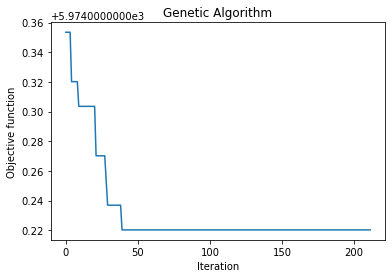


preference: 4756 3382 890 413 0.6722158887371531 0.43474243767994325
Start GA !!!!!
 The best solution found:                                                                           
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]

 Objective function:
 6709.102045512969


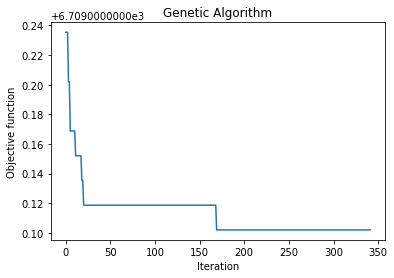


preference: 4605 3454 929 368 0.6736935505826261 0.4611204265693832


KeyboardInterrupt: 

In [46]:

algorithm_param = {'max_num_iteration':None,\
                   'population_size':50,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'two_point',\
                   'max_iteration_without_improv':170}
dft=pd.DataFrame()
hours=8
for i in im:
    df=dataframe(i)
    s_max=[]
    s_min=[]
    for i in range(12):
        sumation_max=df['sum'][i*4:i*4+4].idxmax(axis=0)
        sumation_min=df['sum'][i*4:i*4+4].idxmin(axis=0)
        s_max.append(sumation_max)
        s_min.append(sumation_min)
    df_max=pd.DataFrame()
    df_min=pd.DataFrame()
    for i,j in zip(s_max,s_min):
        df_max=pd.concat([df_max,df[i:i+1]])
        df_min=pd.concat([df_min,df[j:j+1]])
    df_open=df.query('position_number==3')
    df_close=df.query('position_number==1')
    df1=df.iloc
    y=0
    ETP1= random.randint(850,950)
    EVP1 = random.randint(4200,4760)
    ETP2 = random.randint(300,600)
    EVP2 = random.randint(3000,3500)
    VRP1 = random.uniform(0.6,0.8)#<PANEL
    VRP2 = random.uniform(0.3,0.5)#<PANEL
    print('preference:',EVP1,EVP2,ETP1,ETP2,VRP1,VRP2)
    score_max=fuzzy(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,df_max['Ev_U1'].sum(axis=0),df_max['Ev_U2'].sum(axis=0),df_max['Et_U1'].sum(axis=0),df_max['Et_U2'].sum(axis=0),2*df_max['VR1'].mean(axis=0),2*df_max['VR2'].mean(axis=0))
    score_min=fuzzy(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,df_min['Ev_U1'].sum(axis=0),df_min['Ev_U2'].sum(axis=0),df_min['Et_U1'].sum(axis=0),df_min['Et_U2'].sum(axis=0),2*df_min['VR1'].mean(axis=0),2*df_min['VR2'].mean(axis=0))
    score_open=fuzzy(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,df_open['Ev_U1'].sum(axis=0),df_open['Ev_U2'].sum(axis=0),df_open['Et_U1'].sum(axis=0),df_open['Et_U2'].sum(axis=0),2*df_open['VR1'].mean(axis=0),2*df_open['VR2'].mean(axis=0))
    score_close=fuzzy(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,df_close['Ev_U1'].sum(axis=0),df_close['Ev_U2'].sum(axis=0),df_close['Et_U1'].sum(axis=0),df_close['Et_U2'].sum(axis=0),2*df_close['VR1'].mean(axis=0),2*df_close['VR2'].mean(axis=0))
    dfg=pd.DataFrame(columns=['ev1','ev2','et1','et2','vr1','vr2','score'],index=['User preference 'f'{hours}','fully open 'f'{hours}','maximum illuminance 'f'{hours}','optimal 'f'{hours}','minimum illuminance 'f'{hours}','fully close 'f'{hours}'])
    while True:
        f0=df1[0:4].sample(1)
        f1=df1[4:8].sample(1)
        f2=df1[8:12].sample(1)
        f3=df1[12:16].sample(1)
        f4=df1[16:20].sample(1)
        f5=df1[20:24].sample(1)
        f6=df1[24:28].sample(1)
        f7=df1[28:32].sample(1)
        f8=df1[32:36].sample(1)
        f9=df1[36:40].sample(1)
        f10=df1[40:44].sample(1)
        f11=df1[44:48].sample(1)
        df2=pd.DataFrame()
        df2=pd.concat([f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11])
        if 2*np.mean(df2['VR1'])>=VRP1 and 2*np.mean(df2['VR2'])>=VRP2 and sum(df2['Ev_U1'])<EVP1 and sum(df2['Et_U1'])>ETP1 and sum(df2['Ev_U2'])<EVP2 and sum(df2['Et_U2'])>ETP2:
            y=y+1
            score=fuzzy(EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,sum(df2['Ev_U1']),sum(df2['Ev_U2']),sum(df2['Et_U1']),sum(df2['Et_U2']),2*np.mean(df2['VR1']),2*np.mean(df2['VR2']))
            dfg['ev1']=[EVP1,sum(df_open['Ev_U1']),sum(df_max['Ev_U1']),sum(df2['Ev_U1']),sum(df_min['Ev_U1']),sum(df_close['Ev_U1'])]
            dfg['ev2']=[EVP2,sum(df_open['Ev_U2']),sum (df_max['Ev_U2']),sum(df2['Ev_U2']),sum(df_min['Ev_U2']),sum(df_close['Ev_U2'])]
            dfg['et1']=[ETP1,sum(df_open['Et_U1']),sum(df_max['Et_U1']),sum(df2['Et_U1']),sum(df_min['Et_U2']),sum(df_close['Et_U1'])]
            dfg['et2']=[ETP2,sum(df_open['Et_U2']),sum(df_max['Et_U2']),sum(df2['Et_U2']),sum(df_min['Et_U2']),sum(df_close['Et_U2'])]
            dfg['vr1']=[VRP1,2*np.mean(df_open['VR1']),2*np.mean(df_max['VR1']),2*np.mean(df2['VR1']),2*np.mean(df_min['VR1']),2*np.mean(df_close['VR1'])]
            dfg['vr2']=[VRP2,2*np.mean(df_open['VR2']),2*np.mean(df_max['VR2']),2*np.mean(df2['VR2']),2*np.mean(df_min['VR2']),2*np.mean(df_close['VR2'])]
            dfg['score']=[30,score_open,score_max,score,score_min,score_close]
            #visualisation(hours)
            dft=pd.concat([dft,dfg])
            print('found "grid search"')
            break 
        else:
            y=y+1
            if y==500:
                print('Start GA !!!!!')
                varbound=np.array([[1,4]]*12)
                model=ga(function=f,dimension=12,variable_type='int',variable_boundaries=varbound,algorithm_parameters=algorithm_param)
                model.run()
                s=list(model.best_variable)
                ga1=fuzzy1(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11])
                p2=fuzzy1(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,3,3,3,3,3,3,3,3,3,3,3,3)
                p0=fuzzy1(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,1,1,1,1,1,1,1,1,1,1,1,1)
                p1=fuzzy1(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,2,2,2,2,2,2,2,2,2,2,2,2)
                p3=fuzzy1(df1,EVP1,EVP2,ETP1,ETP2,VRP1,VRP2,4,4,4,4,4,4,4,4,4,4,4,4)
                fuzzy_score_position=[p0,p1,p2,p3]
                position=max(fuzzy_score_position)
                if ga1>=position:
                    score=ga1
                    df2=pd.DataFrame()
                    df2=concat1(df1,s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11])
                    dfg['ev1']=[EVP1,sum(df_open['Ev_U1']),sum(df_max['Ev_U1']),sum(df2['Ev_U1']),sum(df_min['Ev_U1']),sum(df_close['Ev_U1'])]
                    dfg['ev2']=[EVP2,sum(df_open['Ev_U2']),sum (df_max['Ev_U2']),sum(df2['Ev_U2']),sum(df_min['Ev_U2']),sum(df_close['Ev_U2'])]
                    dfg['et1']=[ETP1,sum(df_open['Et_U1']),sum(df_max['Et_U1']),sum(df2['Et_U1']),sum(df_min['Et_U2']),sum(df_close['Et_U1'])]
                    dfg['et2']=[ETP2,sum(df_open['Et_U2']),sum(df_max['Et_U2']),sum(df2['Et_U2']),sum(df_min['Et_U2']),sum(df_close['Et_U2'])]
                    dfg['vr1']=[VRP1,2*np.mean(df_open['VR1']),2*np.mean(df_max['VR1']),2*np.mean(df2['VR1']),2*np.mean(df_min['VR1']),2*np.mean(df_close['VR1'])]
                    dfg['vr2']=[VRP2,2*np.mean(df_open['VR2']),2*np.mean(df_max['VR2']),2*np.mean(df2['VR2']),2*np.mean(df_min['VR2']),2*np.mean(df_close['VR2'])]
                    dfg['score']=[30,score_open,score_max,score,score_min,score_close]
                    #visualisation(hours)
                    dft=pd.concat([dft,dfg])
                    print('ga score >all of the 4 positions')
                    break
                else:
                    df2=pd.DataFrame()
                    selected_position=fuzzy_score_position.index(position)
                    if selected_position==0:
                        df2=concat1(df1,1,1,1,1,1,1,1,1,1,1,1,1)
                    elif selected_position==1:
                        df2=concat1(df1,2,2,2,2,2,2,2,2,2,2,2,2)
                    elif selected_position==2:
                        df2=concat1(df1,3,3,3,3,3,3,3,3,3,3,3,3)
                    elif selected_position==3:
                        df2=concat1(df1,4,4,4,4,4,4,4,4,4,4,4,4)
                    score=position
                    dfg['ev1']=[EVP1,sum(df_open['Ev_U1']),sum(df_max['Ev_U1']),sum(df2['Ev_U1']),sum(df_min['Ev_U1']),sum(df_close['Ev_U1'])]
                    dfg['ev2']=[EVP2,sum(df_open['Ev_U2']),sum (df_max['Ev_U2']),sum(df2['Ev_U2']),sum(df_min['Ev_U2']),sum(df_close['Ev_U2'])]
                    dfg['et1']=[ETP1,sum(df_open['Et_U1']),sum(df_max['Et_U1']),sum(df2['Et_U1']),sum(df_min['Et_U2']),sum(df_close['Et_U1'])]
                    dfg['et2']=[ETP2,sum(df_open['Et_U2']),sum(df_max['Et_U2']),sum(df2['Et_U2']),sum(df_min['Et_U2']),sum(df_close['Et_U2'])]
                    dfg['vr1']=[VRP1,2*np.mean(df_open['VR1']),2*np.mean(df_max['VR1']),2*np.mean(df2['VR1']),2*np.mean(df_min['VR1']),2*np.mean(df_close['VR1'])]
                    dfg['vr2']=[VRP2,2*np.mean(df_open['VR2']),2*np.mean(df_max['VR2']),2*np.mean(df2['VR2']),2*np.mean(df_min['VR2']),2*np.mean(df_close['VR2'])]
                    dfg['score']=[30,score_open,score_max,score,score_min,score_close]
                    #visualisation(hours)
                    dft=pd.concat([dft,dfg])
                    print('position'f'{selected_position} score>ga score')
                    break
    hours=hours+1


In [13]:
#dft.to_excel('D:\\dr.tabadkani\\revision\\resault\\sep\\21_sep\\plot\\21_sep.xlsx')

In [47]:
dft

,ev1,ev2,et1,et2,vr1,vr2,score
User preference 8,4306,3023,940,550,0.644109,0.415298,30.00
fully open 8,0,0,0,0,0.800000,0.800000,20.33
maximum illuminance 8,0,0,0,0,0.300000,0.300000,15.50
optimal 8,0,0,0,0,0.800000,0.800000,20.33
minimum illuminance 8,0,0,0,0,0.300000,0.300000,15.50
fully close 8,0,0,0,0,0.300000,0.300000,15.50
User preference 9,4756,3382,890,413,0.672216,0.434742,30.00
fully open 9,0,0,0,0,0.800000,0.800000,20.33
maximum illuminance 9,0,0,0,0,0.300000,0.300000,15.50
optimal 9,0,0,0,0,0.800000,0.800000,20.33


In [34]:
'maximum illuminance 'f'{hours}'

'maximum illuminance 20'